<center>
<h1 style="font-weight:bold;color:#a64d79">Prédictions des survivants du Titanic</h1>
<p>Projet data mining | Analyse de données et prédictions</p>
</center>

<h2 style="font-weight:bold;color:#c27ba0">Objectif</h2>
<p>Grâce au dataset <a href="https://www.kaggle.com/competitions/titanic" style="color:#c27ba0"><b>Titanic</b></a>, nous allons tenter de prédire la survie d'un passager du Titanic.
<br>Pour cela, nous allons dans un premier temps explorer, visualiser et préparer les données.
<br>Ensuite, nous allons construire un modèle de classification et évaluer sa performance dans la prédiction des survivants du Titanic.</p>

<h2 style="font-weight:bold;color:#c27ba0">Exploration des données</h2>

<h3 style="font-weight:bold;color:#a64d79">Création du dataframe</h3>

In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Dans un premier temps, nous allons créer un dataframe à partir des données puis nous allons afficher ses premières lignes.
<br>Cela nous permettra de visualiser les données et d'avoir une première idée des colonnes qui peuvent être pertinentes dans la prédiction.

In [2]:
# Création d'un dataframe à partir du dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/train.csv')

# Affichage information du dataframe
print("Informations du dataframe :")
print("--------------------------------------------")
df.info()

# Visualisation des premières lignes du dataframe
df.head()

Informations du dataframe :
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 style="font-weight:bold;color:#a64d79">Exploration des colonnes</h3>

Nous constatons ainsi que le dataframe contient 891 lignes et qu'il contient 3 types différents de données.
<br>Notre dataframe est constitué de 12 colonnes contenant des informations relatives au passager :
- <b>PassengerId</b> : son numéro d'identification
- <b>Survived</b> : s'il a survécu ou pas
- <b>Pclass</b> : sa classe à bord du Titanic
- <b>Name</b> : son nom
- <b>Sex</b> : son genre
- <b>Age</b> : son âge
- <b>SibSp</b> : le nombre de frère, soeur et conjoint avec qui il voyage à bord du Titanic
- <b>Parch</b> : le nombre de parent et enfant avec qui il voyage à bord du Titanic
- <b>Ticket</b> : le numéro de son billet
- <b>Fare</b> : le tarif de son billet
- <b>Cabin</b> : le numéro de sa cabine
- <b>Embarked</b> : le port depuis lequel il a embarqué (Cherbourg, Southhampton, Queenstown)

Nous essayons de prédire la survie du passager dans le Titanic. Notre variable cible est donc <b style="font-weight:bold;color:#c27ba0">Survived</b>.

Les colonnes <b>Ticket</b> et <b>PassengerId</b> ne sont pas très pertinentes. Nous pouvons les supprimer.
<br>La colonne <b>Name</b> peut être exploitée afin d'identifier un titre de range social dans le nom. Nous allons créer une nouvelle colonne avec le titre et supprimer celle-ci.
<br>La colonne <b>Cabin</b> peut également être exploité si nous étudions l'emplacement des cabines dans le bateau. Cependant, nous n'avons pas assez d'informations pour explorer cette piste. Ainsi, nous pouvons également supprimer cette colonne. 

In [3]:
# Extraction du titre dans le nom
title = df.Name.str.extract('([A-Za-z]+)\.')

# Remplacement par la catégorie sociale dans l'ordre de la hiérarchie
# Noble (3), Officer (2), Ecclesiastical (1), No title (0)

title.replace(to_replace = ['Dr', 'Major', 'Col', 'Capt'], value = 2, inplace=True, regex=True)
title.replace(to_replace = ['Rev'], value = 1, inplace=True, regex=True)
title.replace(to_replace = ['Master', 'Countess', 'Sir', 'Lady', 'Don', 'Jonkheer'], value = 3, inplace = True, regex=True)
title.replace(to_replace = ['Mrs', 'Mr', 'Miss', 'Mlle', 'Mme', 'Ms'], value = 0, inplace = True, regex=True)
df['Title'] = title

# Suppression des colonnes inutiles
df.drop('Name', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Visualisation du dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


<h3 style="font-weight:bold;color:#a64d79">Données manquantes</h3>

Visualisons maintenant les informations concernant le dataframe et vérifions s'il y a des données manquantes.

In [4]:
# Vérification s'il y a des données manquantes
print("Nombre de donnée null par colonne :")
print("---------------------------------")
df.isnull().sum()

Nombre de donnée null par colonne :
---------------------------------


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

Nous constatons que dans les colonnes <b>Age</b> et <b>Embarked</b> des données sont manquantes.
<br>Seules 2 données dans la colonne <b>Embarked</b> sont manquantes. Le port d'embarquement étant une chaine de caractère, nous allons compléter la colonne avec le mode (valeur la plus fréquente).
<br><br>Nous traiterons les données manquantes de la colonnes <b>Age</b> plus tard car celles-ci nécessite plus de traitement. En effet, le nombre de données manquantes dans cette colonnes est très élevé. Compléter ces lignes avec la moyenne globale d'âge sur le Titanic pourrait fortement fausser notre prédiction. Nous essayerons donc de trouver la valeur la plus proche de l'âge de chaque passager en étudier la corrélation de l'âge avec une autre variable du dataset.

In [5]:
# Saisie des données manquantes Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<h3 style="font-weight:bold;color:#a64d79">Conversions des données non numériques</h3>

Afin de mettre en relation ces données et les exploiter au maximum, nous devons les convertir en donnée numériques. Cela nous permettra également d'afficher la matrice de corrélation pour combler les données manquantes de la colonne <b>Age</b>.

In [6]:
# Conversion des données non numériques
# Sex : female (0) et male (1)
# Embarked : C (0), Q (1) et S (2)

from sklearn.preprocessing import LabelEncoder

non_numeric_columns = ['Sex', 'Embarked']
for column in non_numeric_columns:
    df[column] = LabelEncoder().fit_transform(df[column])
df.head()

# Affichage corrélation entre l'âge du passager et un autre critère
print('Corrélation entre l\'âge du passager et les autres critères:')
df.corr().loc['Age']

Corrélation entre l'âge du passager et les autres critères:


Survived   -0.077221
Pclass     -0.369226
Sex         0.093254
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Embarked   -0.030394
Title      -0.267000
Name: Age, dtype: float64

Nous constatons ainsi une forte corrélation négative entre l'âge du passager et la classe dans laquelle celui-ci voyage. Ainsi, nous pouvons calculer la moyenne d'âge dans chacune des classes et utiliser cette valeur pour compléter les données manquantes du tableau.
<br>Pour un résultat plus précis nous aurions pu prendre en compte l'ensemble des critères et définir l'âge moyen en fonction des combinaisons différentes.

In [7]:
# Calcul de l'âge moyen par classe
print('Moyenne d\'âge des passager en fonction de la classe :\n')
mean_age_by_pclass = df.groupby('Pclass')['Age'].mean()
print(mean_age_by_pclass)

# Remplacement des valeurs manquantes dans Age
for x in range(1,4,1):
    df['Age'].fillna(mean_age_by_pclass.loc[x], inplace=True)

# Vérification des données manquantes
print("Nombre de donnée null par colonne :")
print("---------------------------------")
df.isnull().sum()

Moyenne d'âge des passager en fonction de la classe :

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Nombre de donnée null par colonne :
---------------------------------


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

<h3 style="font-weight:bold;color:#a64d79">Visualisation des données des colonnes</h3>

Maintenant que nous avons compléter toutes les données manquantes et que nous avons uniquement des données numériques, nous pouvons afficher une description statistiques des variables.

In [8]:
# Séparation des colonnes catégoriques et numériques
df_numeric = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_categoric = df[['Survived','Pclass','Sex','Embarked', 'Title']]


# Statistiques descriptives des variables catégoriques (personnalisé pour obtenir des valeurs plus pertinentes)
# Avec affichage semblable aux statistiques descriptives des caractéristiques
print(f"Statistiques descriptives des variables catégoriques :\n")
categoric_stats_list = []
for column in df_categoric.columns:
    stats = {
        'count': df_categoric[column].count(),
        'count 0': (df_categoric[column] == 0).sum(),
        'count 0 (%)': ((df_categoric[column] == 0).sum()) * 100 / df_categoric[column].count(),
        'count 1': (df_categoric[column] == 1).sum(),
        'count 1 (%)': ((df_categoric[column] == 1).sum()) * 100 / df_categoric[column].count(),
        'count 2': (df_categoric[column] == 2).sum(),
        'count 2 (%)': ((df_categoric[column] == 2).sum()) * 100 / df_categoric[column].count(),
        'count 3': (df_categoric[column] == 3).sum(),
        'count 3 (%)': ((df_categoric[column] == 3).sum()) * 100 / df_categoric[column].count()
    }
    categoric_stats_list.append(stats)

categoric_stats = pd.DataFrame(categoric_stats_list, index=df_categoric.columns)
categoric_stats = categoric_stats.rename({0: 'Survived', 1: 'Pclass', 2: 'Sex', 3: 'Embarked', 4: 'Title'})
categoric_stats = categoric_stats.T
print(categoric_stats)
print('\nLégende :\nSex | Female (0) et le (1)\nEmbarked | Cherbourg (0), Queenstown (1) et Southhampton (2)\nTitle | No title (0), Ecclesiastical (1), Officer (2), Noble (3)')

# Statistiques descriptives des variables numériques
print(f"\n\nStatistiques descriptives des variables numériques :\n")
print(df_numeric.describe())

Statistiques descriptives des variables catégoriques :

               Survived      Pclass         Sex    Embarked       Title
count        891.000000  891.000000  891.000000  891.000000  891.000000
count 0      549.000000    0.000000  314.000000  168.000000  828.000000
count 0 (%)   61.616162    0.000000   35.241302   18.855219   92.929293
count 1      342.000000  216.000000  577.000000   77.000000    6.000000
count 1 (%)   38.383838   24.242424   64.758698    8.641975    0.673401
count 2        0.000000  184.000000    0.000000  646.000000   12.000000
count 2 (%)    0.000000   20.650954    0.000000   72.502806    1.346801
count 3        0.000000  491.000000    0.000000    0.000000   45.000000
count 3 (%)    0.000000   55.106622    0.000000    0.000000    5.050505

Légende :
Sex | Female (0) et le (1)
Embarked | Cherbourg (0), Queenstown (1) et Southhampton (2)
Title | No title (0), Ecclesiastical (1), Officer (2), Noble (3)


Statistiques descriptives des variables numériques :

    

Traçons maintenant des graphiques visuels afin d'illustrer ces informations et mieux les comprendre.
<br>Nous avons constaté que la distribution du prix des billets est très étendue. Afin de stabiliser la variance et faciliter la détection des modèles, nous allons effectuer une transformation logarithmique.

Distribution des données catégoriques : 


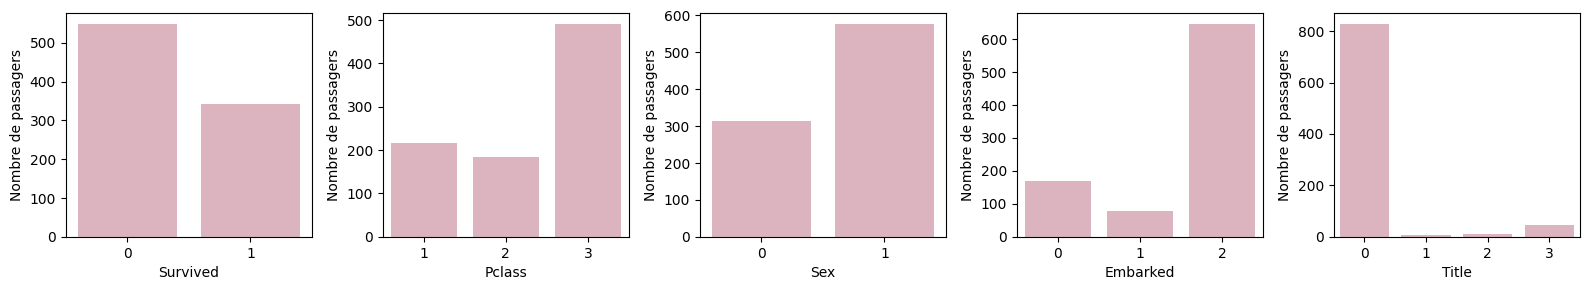

Distribution des données numériques : 


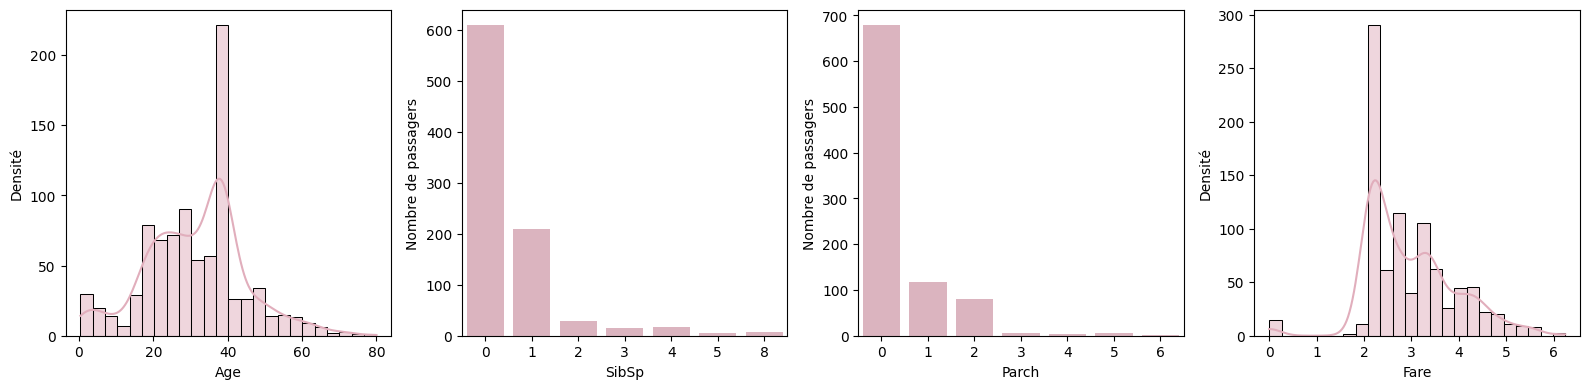

In [9]:
# Distribution des données catégoriques (dont distribution des classes)
print('Distribution des données catégoriques : ')
fig, axes = plt.subplots(1, 5, figsize=(16, 3))
for x, categoric_info in enumerate(df_categoric.columns):
    sns.countplot(x=categoric_info, data=df_categoric, color="#E1AEBC", ax=axes[x])
    axes[x].set_ylabel("Nombre de passagers")
plt.tight_layout()
plt.show()

# Transformation logarithmique pour Fare
df['Fare'] = np.log(df['Fare']+1)

# Distribution des données numériques
print('Distribution des données numériques : ')
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for x, numeric_info in enumerate(df_numeric.columns):
    if(numeric_info == 'SibSp' or numeric_info == 'Parch'):
        sns.countplot(x=numeric_info, data=df_numeric, color="#E1AEBC", ax=axes[x])
        axes[x].set_ylabel("Nombre de passagers")
    else:
        sns.histplot(x=df[numeric_info].dropna(), kde=True, color="#E1AEBC", ax=axes[x])
        axes[x].set_ylabel("Densité")
plt.tight_layout()
plt.show()

<h3 style="font-weight:bold;color:#a64d79">Matrice de corrélation</h3>

Recherchons maintenant une corrélation entre la survie d'un passager et les autre caractéristiques lui correspondant.

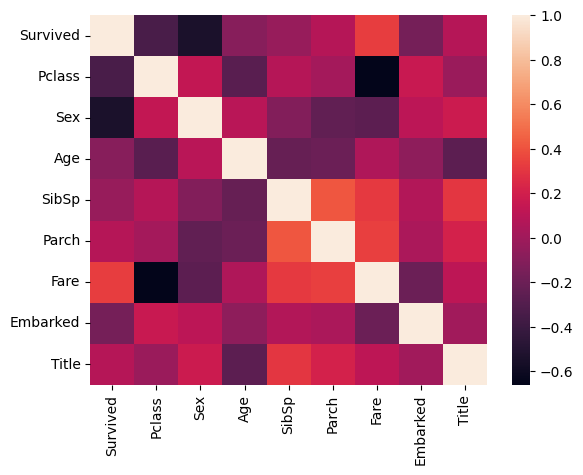

Matrice de corrélation :


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,-0.338481,-0.543351,-0.090898,-0.035322,0.081629,0.329862,-0.167675,0.082092
Pclass,-0.338481,1.000000,0.131900,-0.276683,0.083081,0.018443,-0.661022,0.162098,-0.021163
Sex,-0.543351,0.131900,1.000000,0.095401,-0.114631,-0.245489,-0.263276,0.108262,0.169900
Age,-0.090898,-0.276683,0.095401,1.000000,-0.220222,-0.204796,0.057208,-0.064594,-0.264800
SibSp,-0.035322,0.083081,-0.114631,-0.220222,1.000000,0.414838,0.318528,0.068230,0.303551
Parch,0.081629,0.018443,-0.245489,-0.204796,0.414838,1.000000,0.332186,0.039798,0.211025
Fare,0.329862,-0.661022,-0.263276,0.057208,0.318528,0.332186,1.000000,-0.202444,0.111966
Embarked,-0.167675,0.162098,0.108262,-0.064594,0.068230,0.039798,-0.202444,1.000000,0.003031
Title,0.082092,-0.021163,0.169900,-0.264800,0.303551,0.211025,0.111966,0.003031,1.000000


In [10]:
# Affichage matrice de corrélation sous forme de graphique
sns.heatmap(df.corr(), annot=False)
plt.show()

# Affichage matrice de corrélation sous forme de tableau
print('Matrice de corrélation :')
df.corr()

Nous pouvons constater qu'il y a une forte corrélation négative entre la survie du passager et le prix de son billet. Ceci explique également la forte corrélation positive entre la classe de voyage et la survie du passage. En effet, plus la classe est petite plus le billet est cher.
<br>Nous constatons également une forte corrélation positive entre le genre du passager et ses chances de survie.
<br><br><b>Ainsi, nous pouvons en déduire qu'un passager de sexe féminin voyageant en première classe a plus de chance de survie qu'un passager de sexe masculin voyageant en classe économique (3e).</b>

<h3 style="font-weight:bold;color:#a64d79">Données d'entrainement et de test</h3>

Préparons maintenant nos données en les divisant en 2 ensembles : données d'entraînement (80%) et de test (20%). Cela nous permettra ensuite d'évaluer la performance du modèle sur des données qui n'ont pas été utilisées dans l'apprentissage.
<br><br>Nous allons ensuite normaliser les caractéristiques d'entrainement afin de faciliter la détection de modèle.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Division en des données ensemble d'entrainement et de test
train_info, test_info, train_target, test_target = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=10)

# Normalisation des caractéristiques
scaler = StandardScaler()
train_info = scaler.fit_transform(train_info)
test_info = scaler.transform(test_info)

<h3 style="font-weight:bold;color:#a64d79">Modélisation de classification</h3>

Utilisons maintenant un modèle de classification pour prédire si un passager aurait pu survivre ou pas au naufrage du Titanic. 

In [12]:
from sklearn.linear_model import LogisticRegression

# Modélisation de classification
model = LogisticRegression(random_state=10)

# Entrainement du modèle et prédiction de la variable cible dans l'ensemble test
model.fit(train_info, train_target)
predictions = model.predict(test_info)

<h3 style="font-weight:bold;color:#a64d79">Performance du modèle</h3>

Exactitude du modèle de  84.36 %

Matrice de confusion :
--------------------------------------------------------


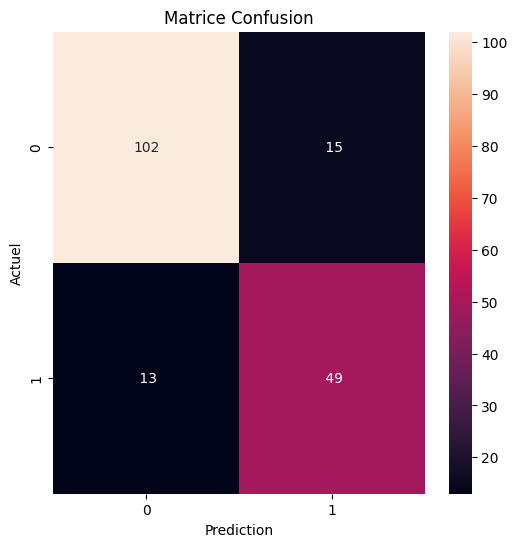


Statistiques du modèle :
--------------------------------------------------------

               precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.77      0.79      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Exactitude du modèle
accuracy = (accuracy_score(test_target, predictions))*100
print(f"Exactitude du modèle de {accuracy: .2f} %")

# Matrice de confusion
confusion_mat = confusion_matrix(test_target, predictions)
print("\nMatrice de confusion :\n--------------------------------------------------------")

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(test_target, predictions), annot=True, fmt='3.0f')
plt.title('Matrice Confusion')
plt.xlabel('Prediction')
plt.ylabel('Actuel')
plt.show()

# Statistiques du modèle
print(f"\nStatistiques du modèle :\n--------------------------------------------------------\n\n {classification_report(test_target, predictions)}")

Notre modèle est précis à 89 % dans la prédiction des passagers décédés et à 77% dans la prédiction des passagers ayant survécu. Il est donc précis à <b>84,36 %</b> dans sa prédiction globale.
<br>En effet, sur les 179 passagers,le  modèle a su correctement prédire le décès de 102 passagers et la survie 49 passagers.
Il s'est trompé sur 28 passagers : 13 d'entre eux ont été prédits à tord comme décédé lors du naufrage du Titanic et 15 d'entres eux comme survivants de l'accident.

<h3 style="font-weight:bold;color:#a64d79">Réglages hyperparamètres</h3>

Nous pouvons améliorer la performance du modèle en ajustant les hyperparamètres. Il s'agit de paramètres d'ajustements des algorithmes de Machine Learning.
Ils influent sur la manière dont le modèle est entrainé et sur sa façon d'apprendre.
<br>Nous allons utiliser la méthode de recherche par grille qui permet d'entrainer le modèle sur toutes les combinaisons d'hyperparamètres possibles pour trouver celle qui offre la meilleure performance.

Combinaison des hyperparamètres optimale :

 {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Exactitude du nouveau modèle de  84.92 %

Courbe ROC :
--------------------------------------------------------

Aire sous la courbe : 0.89


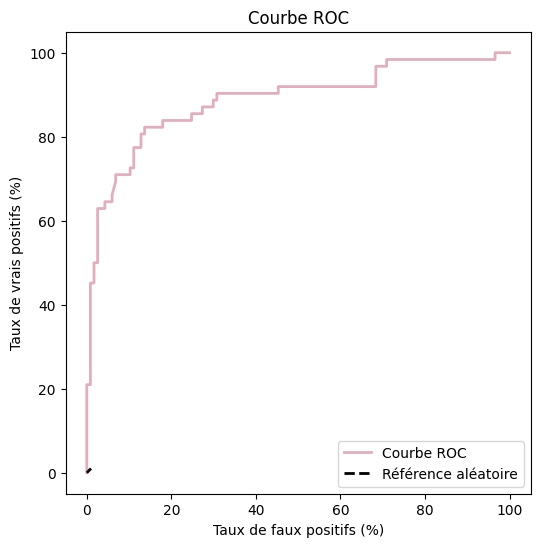

In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparamètres à optimiser
hyperparameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Entrainement du modèle avec recherches des hyperparamètres optimaux et prédiction
model = LogisticRegression(random_state=10)
model.fit(train_info, train_target)
grid_search = GridSearchCV(model, hyperparameter_grid, cv=5, scoring='accuracy')
grid_search.fit(train_info, train_target)

print("Combinaison des hyperparamètres optimale :\n\n", grid_search.best_params_)
best_combine = grid_search.best_estimator_

predictions = best_combine.predict(test_info)

# Performances du modèle
accuracy = (accuracy_score(test_target, predictions))*100
print(f"\nExactitude du nouveau modèle de {accuracy: .2f} %")

# Courbe ROC
print(f"\nCourbe ROC :\n--------------------------------------------------------")

probability_target = model.predict_proba(test_info)[:, 1]
fpr, tpr, thresholds = roc_curve(test_target, probability_target)
roc_auc = auc(fpr, tpr)

print(f"\nAire sous la courbe : {roc_auc:.2f}")

plt.figure(figsize=(6, 6))
plt.plot((fpr*100), (tpr*100), color="#E1AEBC", lw=2, label="Courbe ROC")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle='--', label="Référence aléatoire")
plt.title("Courbe ROC")
plt.xlabel("Taux de faux positifs (%)")
plt.ylabel("Taux de vrais positifs (%)")
plt.legend(loc="lower right")
plt.show()

Nous avns réussi à améliorer la performarnance du modèle. Sa précision s'élève maintenant à <b>84,92 %</b>. 

La courbe ROC permet d'évaluer la performance du modèle. Elle représente le taux de vrais positifs, soit le taux de passagers ayant survécu correctement prédit par le modèle, en fonction du taux de faux positifs, soit le taux de passagers prédit à tord comme survivant par le modèle.
<br>Dans notre modèle, l'aire sous la courbe est de 0.89, cela signifie qu'il est assez performant (89%).

<h2 style="font-weight:bold;color:#c27ba0">Conclusion</h2>

Dans un premier temps, nous avons exploré les colonnes du dataset afin d'identifier les données pertinentes.

Nous avons ensuite effectuer les transformations nécessaires sur les données pour pouvoir mieux les exploiter. Nous avons également compléter les données manquantes grâce à une analyse de corrélation avec les autres données.

Nous avons ensuite scinder les données en deux ensembles. Un modèle de classification a été ensuite utilisé afin de réaliser un apprentissage supervisée sur le premier ensemble de données puis une prédiction sur les données du deuxième ensemble. Nous avons également régler les hyperparamètres afin d'améliorer la performance du modèle.
<br>La performance du modèle peut encore être amélioré si nous avions étudier les informations relatives aux cabines et à leur disposition dans le bateau.
En améliorant le modèle, il pourrait peut-être avoir un jour un AUC proche de 1 et donc être considéré comme extrêment fiable.

C'est ainsi que nous avons réussi à prédire à <b>84,92 %</b> la survie d'un passager du Titanic lors du nauffrage.

<br><b>Un passager de sexe féminin voyageant en première classe a plus de chance de survie qu'un passager de sexe masculin voyageant en classe économique (3e).</b>